In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn for statistical plots
import seaborn as sns
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression #scikit learn library



In [2]:
A=pd.read_csv('housing.csv',index_col=0)
A.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
A.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


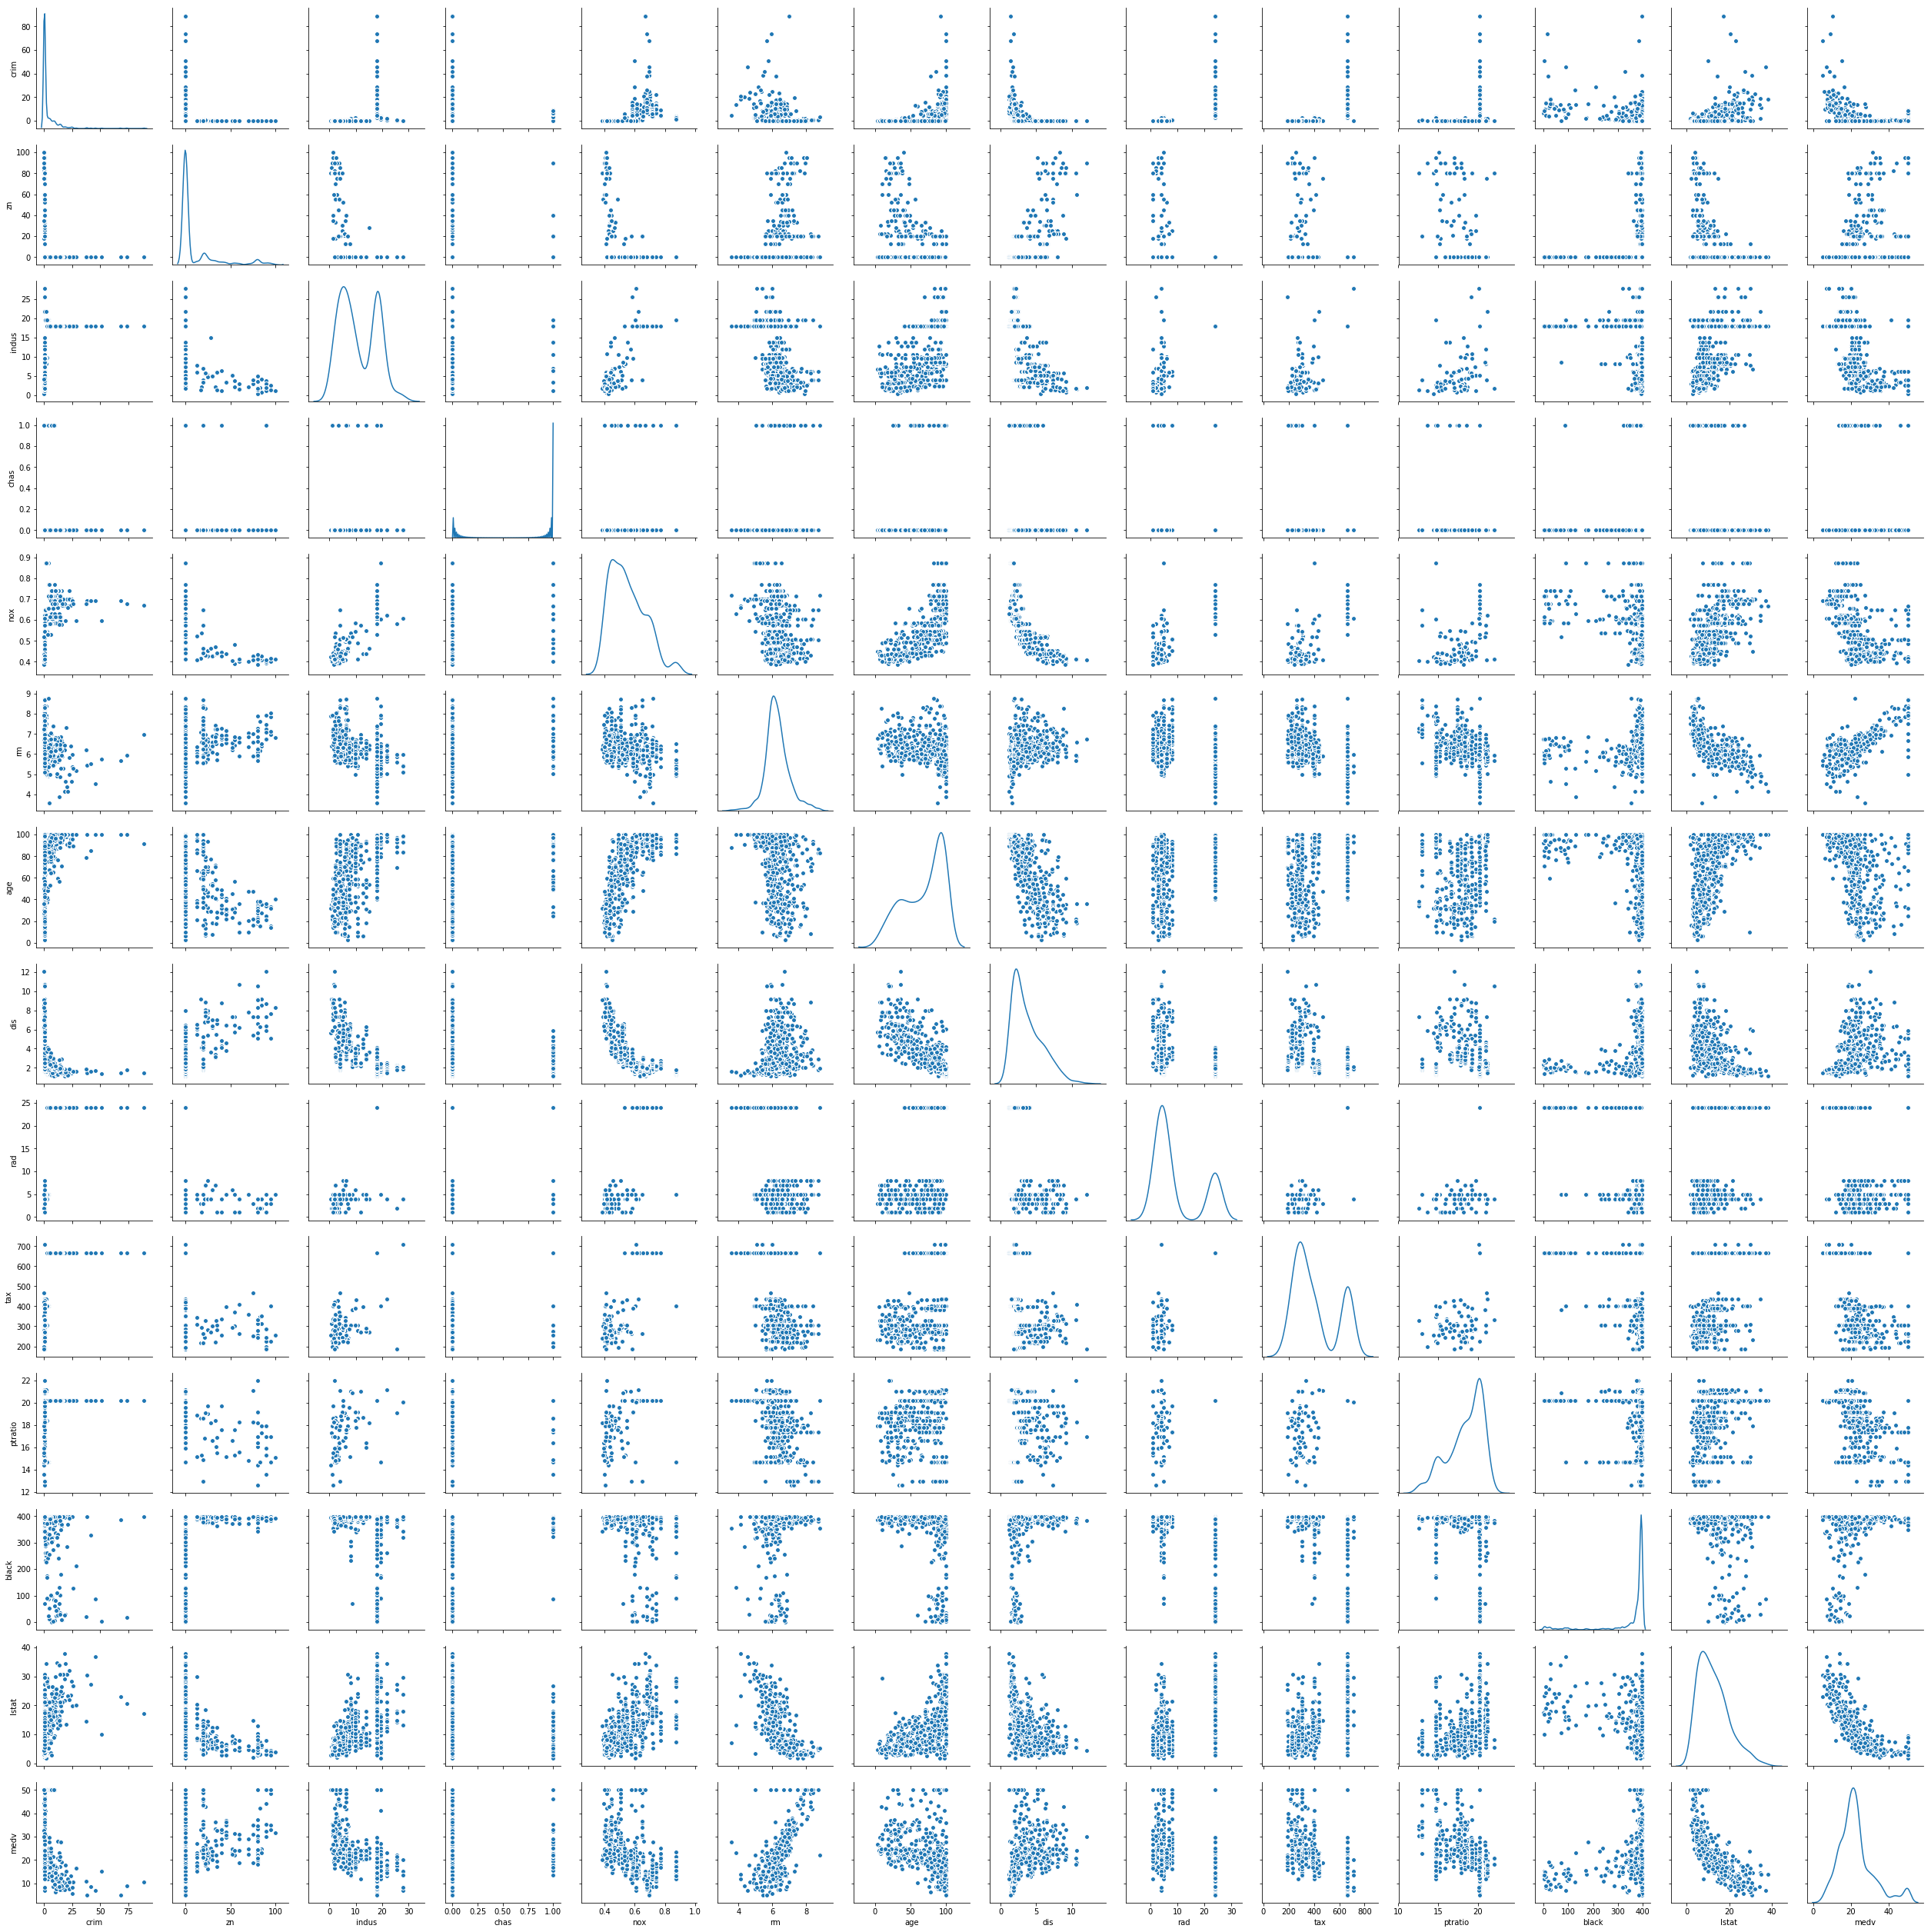

In [3]:
sns.pairplot(A,diag_kind='kde')

# To reduce rmse score(Average Error) we use PolynnomialFeatures if at all we get non linear relationship between dependent and independent variable

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
x=A[['lstat']]   #Lower status of people(density)
y=A[['medv']]    #HOusing value in$1000

In [6]:
lm=LinearRegression()
lm.fit(x,y)
lm_predict=lm.predict(x)

lm_rmse=np.sqrt(np.sum((lm_predict-y)**2)/len(y))
lm_rmse

medv    6.203464
dtype: float64

In [23]:
lm.score(x,y)

0.5441462975864797

In [7]:
#Quadratic Regression Model(we use it when the model is having non linear relationship)
qr=PolynomialFeatures(degree=7)    #change degree here to reduce the error and observe rmse
x_qr=qr.fit_transform(x)



In [8]:
m2=LinearRegression()
m2.fit(x_qr,y)
y2_predict=m2.predict(x_qr)

In [9]:
qr_rmse=np.sqrt(np.sum((y2_predict-y)**2)/len(y))
qr_rmse

medv    5.174982
dtype: float64

In [10]:
m2.score(x_qr,y)  #higher the r-square value lower the rmse score

0.6827697469493311

In [11]:
x_qr_df=pd.DataFrame(x_qr)
x_qr_df.head()


,0,1,2,3,4,5,6,7
0,1.0,4.98,24.8004,123.505992,615.059840,3062.998004,15253.730060,7.596358e+04
1,1.0,9.14,83.5396,763.551944,6978.864768,63786.823981,583011.571186,5.328726e+06
2,1.0,4.03,16.2409,65.450827,263.766833,1062.980336,4283.810755,1.726376e+04
3,1.0,2.94,8.6436,25.412184,74.711821,219.652754,645.779096,1.898591e+03
4,1.0,5.33,28.4089,151.419437,807.065599,4301.659644,22927.845901,1.222054e+05


In [12]:
x_qr_df=x_qr_df.drop(0,axis=1)
x_qr_df.head()

,1,2,3,4,5,6,7
0,4.98,24.8004,123.505992,615.059840,3062.998004,15253.730060,7.596358e+04
1,9.14,83.5396,763.551944,6978.864768,63786.823981,583011.571186,5.328726e+06
2,4.03,16.2409,65.450827,263.766833,1062.980336,4283.810755,1.726376e+04
3,2.94,8.6436,25.412184,74.711821,219.652754,645.779096,1.898591e+03
4,5.33,28.4089,151.419437,807.065599,4301.659644,22927.845901,1.222054e+05


In [13]:
idx=np.arange(506)

In [14]:
y.index=idx

In [15]:
x_qr_df=pd.concat([x_qr_df,y],axis=1)
x_qr_df

,1,2,3,4,5,6,7,medv
0,4.98,24.8004,123.505992,615.059840,3.062998e+03,1.525373e+04,7.596358e+04,24.0
1,9.14,83.5396,763.551944,6978.864768,6.378682e+04,5.830116e+05,5.328726e+06,21.6
2,4.03,16.2409,65.450827,263.766833,1.062980e+03,4.283811e+03,1.726376e+04,34.7
3,2.94,8.6436,25.412184,74.711821,2.196528e+02,6.457791e+02,1.898591e+03,33.4
4,5.33,28.4089,151.419437,807.065599,4.301660e+03,2.292785e+04,1.222054e+05,36.2
5,5.21,27.1441,141.420761,736.802165,3.838739e+03,1.999983e+04,1.041991e+05,28.7
6,12.43,154.5049,1920.495907,23871.764124,2.967260e+05,3.688305e+06,4.584563e+07,22.9
7,19.15,366.7225,7022.735875,134485.392006,2.575395e+06,4.931882e+07,9.444554e+08,27.1
8,29.93,895.8049,26811.440657,802466.418864,2.401782e+07,7.188534e+08,2.151528e+10,16.5
9,17.10,292.4100,5000.211000,85503.608100,1.462112e+06,2.500211e+07,4.275361e+08,18.9


In [16]:
x_qr_df.columns=['f1','f2','f3','f4','f5','f6','f7','medv']

In [17]:
x_qr_df.head()

,f1,f2,f3,f4,f5,f6,f7,medv
0,4.98,24.8004,123.505992,615.059840,3062.998004,15253.730060,7.596358e+04,24.0
1,9.14,83.5396,763.551944,6978.864768,63786.823981,583011.571186,5.328726e+06,21.6
2,4.03,16.2409,65.450827,263.766833,1062.980336,4283.810755,1.726376e+04,34.7
3,2.94,8.6436,25.412184,74.711821,219.652754,645.779096,1.898591e+03,33.4
4,5.33,28.4089,151.419437,807.065599,4301.659644,22927.845901,1.222054e+05,36.2


In [18]:
import statsmodels.formula.api as smf

In [19]:
model=smf.ols('medv~f1+f2+f3+f4+f5+f6+f7',x_qr_df).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     153.1
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          8.06e-120
Time:                        11:26:13   Log-Likelihood:                -1549.8
No. Observations:                 506   AIC:                             3116.
Df Residuals:                     498   BIC:                             3149.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.6862      8.452      8.363      0.000      54.079      87.293
f1           -13.4743      5.431     -2.481      0.013     -24.145      -2.804
f2             1.4885      1.316      1.131      0.259      -1.097       4.074
f3            -0.0752      0.158     -0.477      0.634      -0.385       0.235
f4             0.0010      0.010      0.094      0.925      -0.019       0.021
f5          5.193e-05      0.000      0.140      0.888      -0.001       0.001
f6         -1.951e-06   6.86e-06     -0.284      0.776   -1.54e-05    1.15e-05
f7           1.91e-08   5.13e-08      0.372      0.710   -8.17e-08     1.2e-07
==============================================================================
Omnibus:                      146.193   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.269
Skew:                           1.306   Prob(JB):                    2.59e-111
Kurtosis:                       7.163   Cond. No.                     4.07e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,70.6862,8.452,8.363,0.000,54.079,87.293
f1,-13.4743,5.431,-2.481,0.013,-24.145,-2.804
f2,1.4885,1.316,1.131,0.259,-1.097,4.074
f3,-0.0752,0.158,-0.477,0.634,-0.385,0.235
f4,0.0010,0.010,0.094,0.925,-0.019,0.021
f5,5.193e-05,0.000,0.140,0.888,-0.001,0.001
f6,-1.951e-06,6.86e-06,-0.284,0.776,-1.54e-05,1.15e-05
f7,1.91e-08,5.13e-08,0.372,0.710,-8.17e-08,1.2e-07
